# Checkpoint 1

Implement here your algorithm to interpolate/extrapolate the activation time field from timings recorded in the 20 electrodes of the mapping catheter.

The algorithm should output the following information:
- a reconstruction of the activation times evaluated at each point of a structured grid on the square (-1.5, 1.5)x(-1.5, 1.5),
- an approximation of the conduction velocity (a clinical biomarker) evaluated at each point of a structured grid on the same square.


In [ ]:
# imports

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# loading of the dataset

CP1data = np.load("CP1data.npz")
CP1data = CP1data['arr_0']

# Display one recording

In [ ]:
ind_disp = 1
x_meas = CP1data[ind_disp][0]
y_meas = CP1data[ind_disp][1]
t_meas = CP1data[ind_disp][2]

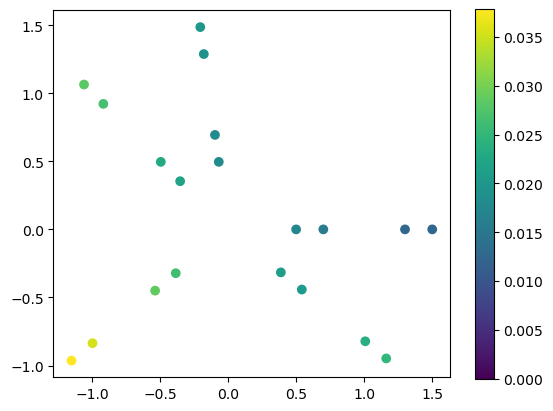

In [ ]:
# Display a sample

plt.figure(1)
plt.scatter( x_meas,  y_meas, c=t_meas, vmin= 0, vmax=np.max(t_meas) )
plt.gca().set_aspect(1)
plt.colorbar()

# signature of the function

def checkpoint1_solution( x, y , t, X , Y ):

return time_pred,vel_pred



In [ ]:
from scipy.interpolate import griddata

X, Y = np.meshgrid(np.linspace(-1.5,1.5,1501), np.linspace(-1.5,1.5,1501))

def checkpoint1_solution( x, y , t, X , Y ):

    time_pred = griddata(list(zip(x, y)), t, (X, Y), method='nearest')

    grad_AT = np.gradient(time_pred)

    vel_pred = 1.0/( np.sqrt((grad_AT[0]/(3.0/1500))**2+(grad_AT[1]/(3.0/1500))**2) + 1e-4)

    return time_pred,vel_pred

time_pred,vel_pred = checkpoint1_solution( x_meas, y_meas , t_meas, X , Y )

(0.0, 0.1)

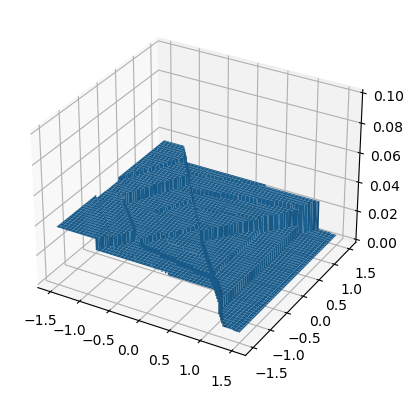

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X,Y,time_pred)
ax.axes.set_zlim3d(bottom=0, top=0.1)

In [ ]:
print('ciao')